 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Set the file paths for the CSVs using the Path class from the pathlib library

whale_returns_path = Path("../Starter_Code/Resources/whale_returns.csv")
algo_returns_path = Path("../Starter_Code/Resources/algo_returns.csv")
sp500_returns_path = Path("../Starter_Code/Resources/sp500_history.csv")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_path, parse_dates=True, index_col='Date')

In [4]:
# Count nulls
whale_null_counts = whale_returns.isnull().sum()
# Display null counts
print("Null counts:\n", whale_null_counts)

Null counts:
 SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_returns_path, parse_dates=True, index_col='Date')

In [7]:
# Count nulls
algo_null_counts = whale_returns.isnull().sum()
# Display null counts
print("Null counts:\n", algo_null_counts)

Null counts:
 SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


In [8]:
# Drop nulls
algo_returns = algo_returns.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Read the S&P 500 data 
sp500_returns = pd.read_csv(sp500_returns_path, parse_dates=True, index_col='Date')

C:\Users\jacks\AppData\Local\Temp\ipykernel_38620\496404852.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_returns = pd.read_csv(sp500_returns_path, parse_dates=True, index_col='Date')


In [10]:
# Check Data Types
print(sp500_returns.dtypes)

Close    object
dtype: object


In [11]:
# Fix Data Types
sp500_returns['Close'] = sp500_returns['Close'].replace('[\$,]', '', regex=True).astype(float)

In [12]:
# Sort the DataFrame by date
sp500_returns = sp500_returns.sort_index()

In [13]:
# Calculate Daily Returns
sp500_returns['SP500'] = sp500_returns['Close'].pct_change()

In [14]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.drop(columns=['Close'])

In [16]:
# Check Data Types after Fixing
print(sp500_returns.dtypes)

SP500    float64
dtype: object


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Merge Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame
combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

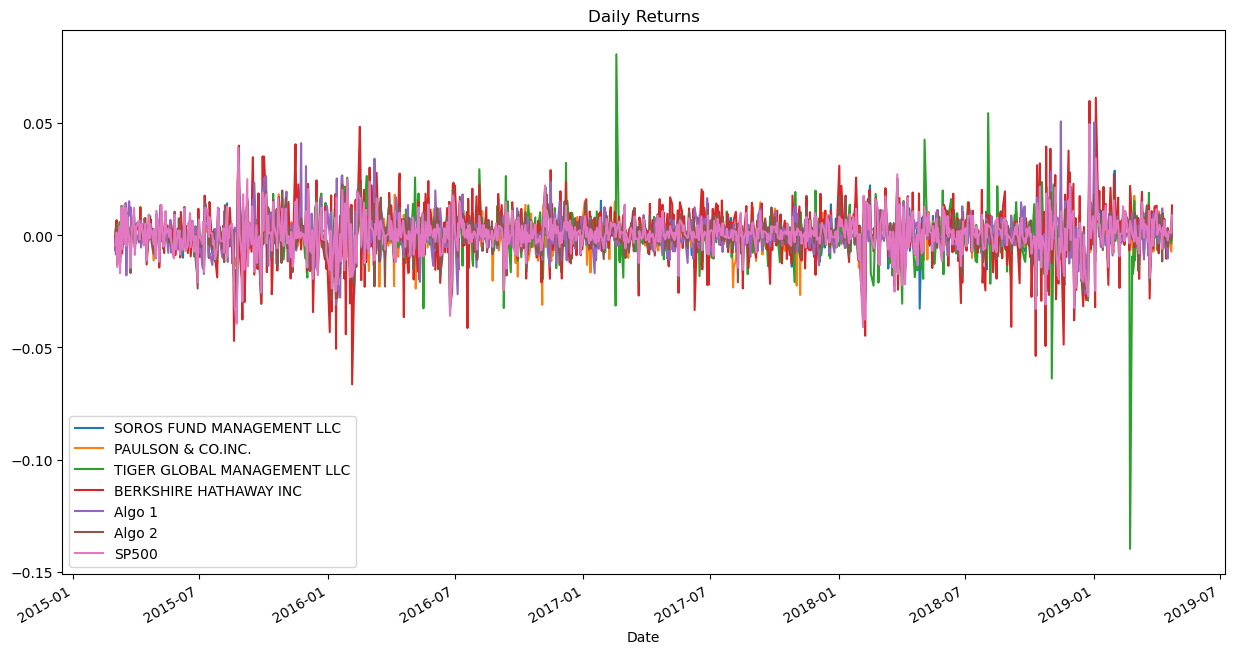

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15, 8), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

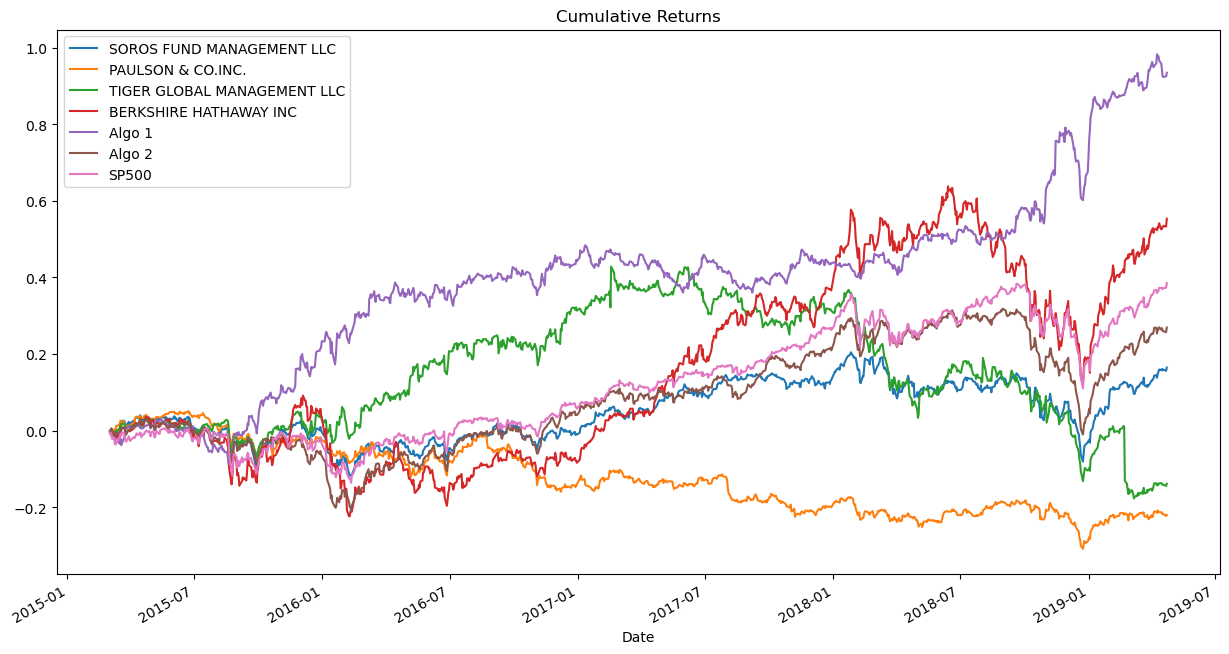

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(15, 8), title="Cumulative Returns")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Box Plots of Returns')

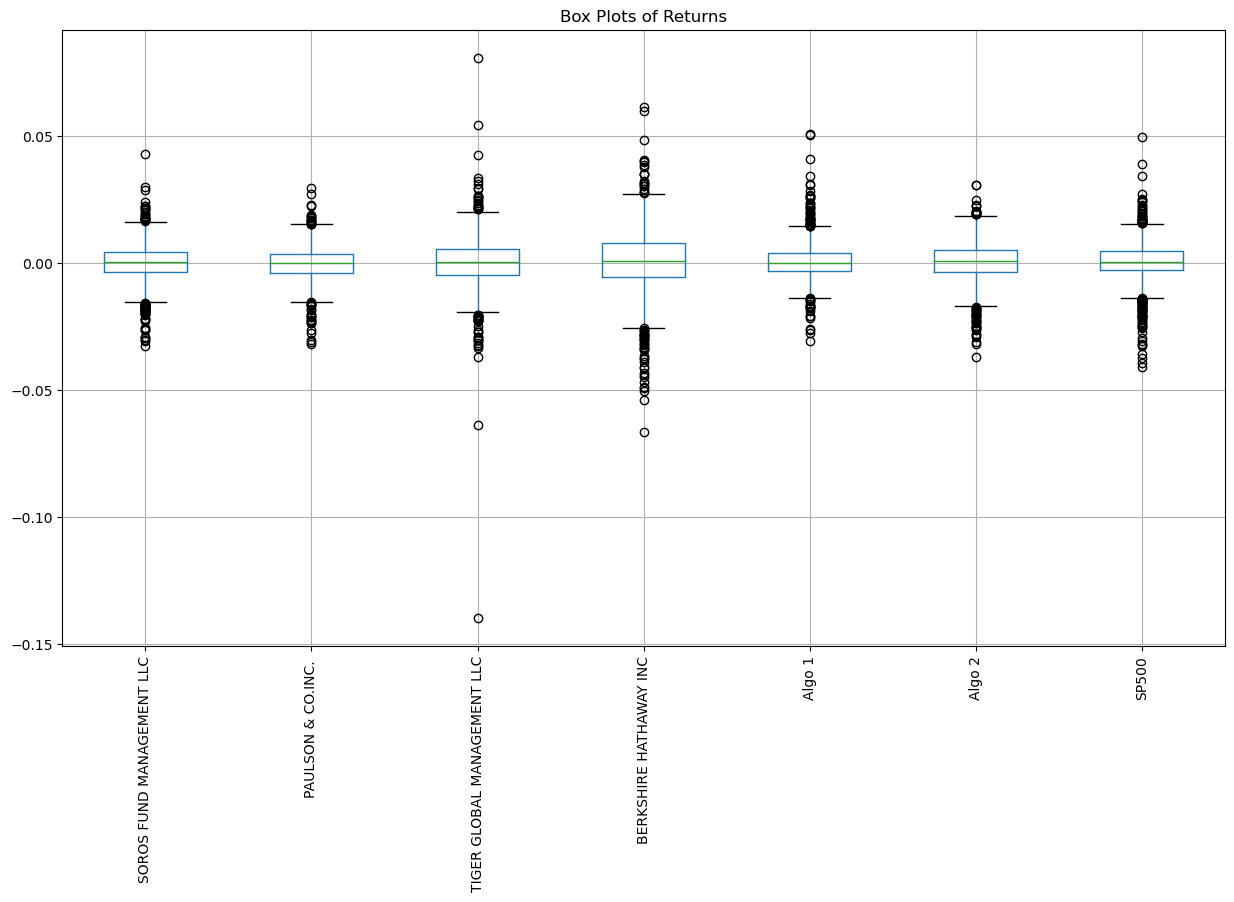

In [20]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(15, 8), vert=True,rot = 90)

plt.title("Box Plots of Returns")

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
std_dev = combined_df.std()
print(std_dev)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate the daily standard deviation of S&P 500
sp500_daily_std = combined_df["SP500"].std()
sp500_daily_std

0.008553731597758204

In [23]:
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = std_dev[std_dev > sp500_daily_std]

# Print the riskier portfolios
print("\nPortfolios Riskier than S&P 500:")
print(riskier_portfolios)


Portfolios Riskier than S&P 500:
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std = std_dev * np.sqrt(252)
annulized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

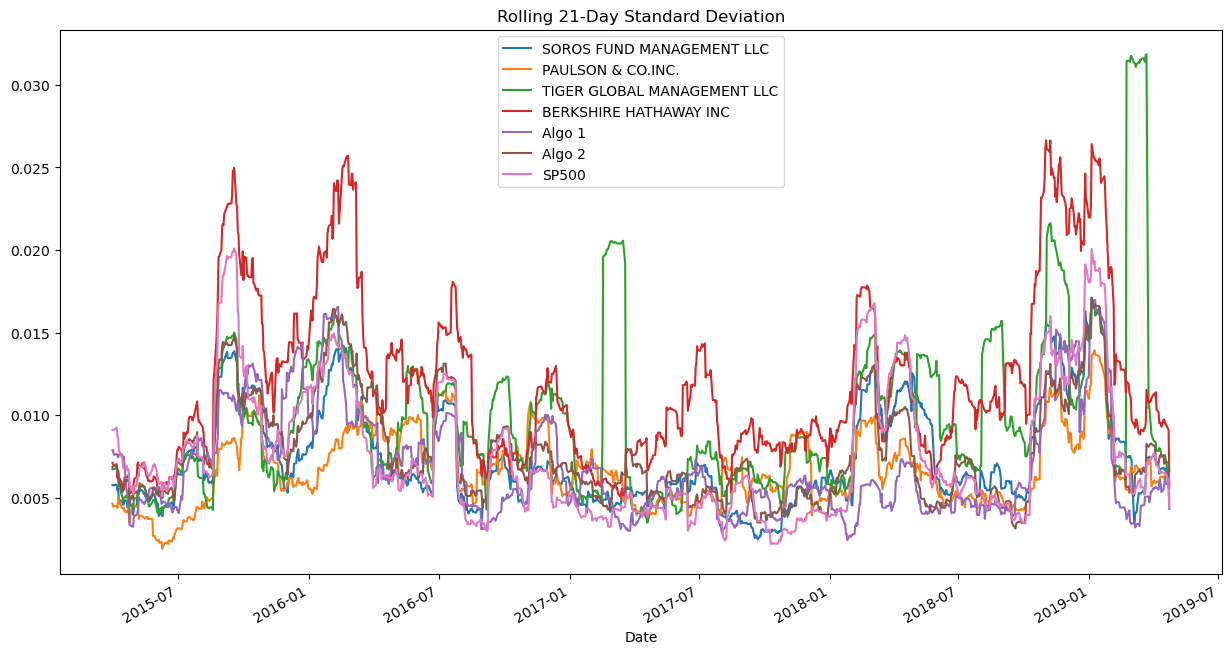

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,8),title="Rolling 21-Day Standard Deviation")

### Calculate and plot the correlation

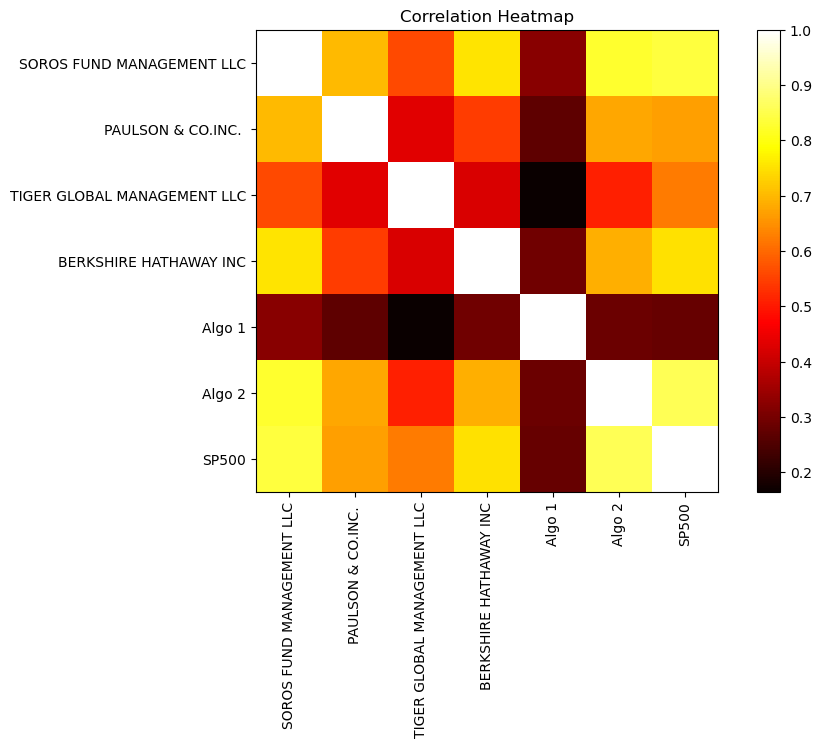

In [26]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
plt.figure(figsize=(10, 6))
plt.imshow(correlation, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title('Correlation Heatmap')
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

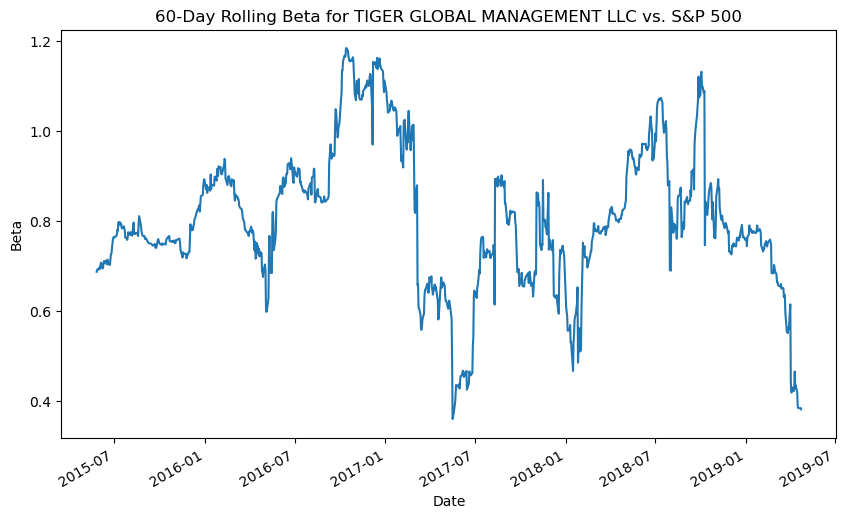

In [27]:
chosen_portfolio = 'TIGER GLOBAL MANAGEMENT LLC'

# Calculate covariance of a single portfolio
covariance = combined_df[chosen_portfolio].cov(combined_df['SP500'])

# Calculate variance of S&P 500
variance = combined_df['SP500'].var()

# Computing beta
beta = covariance / variance

# Calculate the 60-day rolling beta
rolling_beta = combined_df[chosen_portfolio].rolling(window=60).cov(combined_df['SP500']) / combined_df['SP500'].rolling(window=60).var()

# Plot beta trend
plt.figure(figsize=(10, 6))
rolling_beta.plot(title=f'60-Day Rolling Beta for {chosen_portfolio} vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

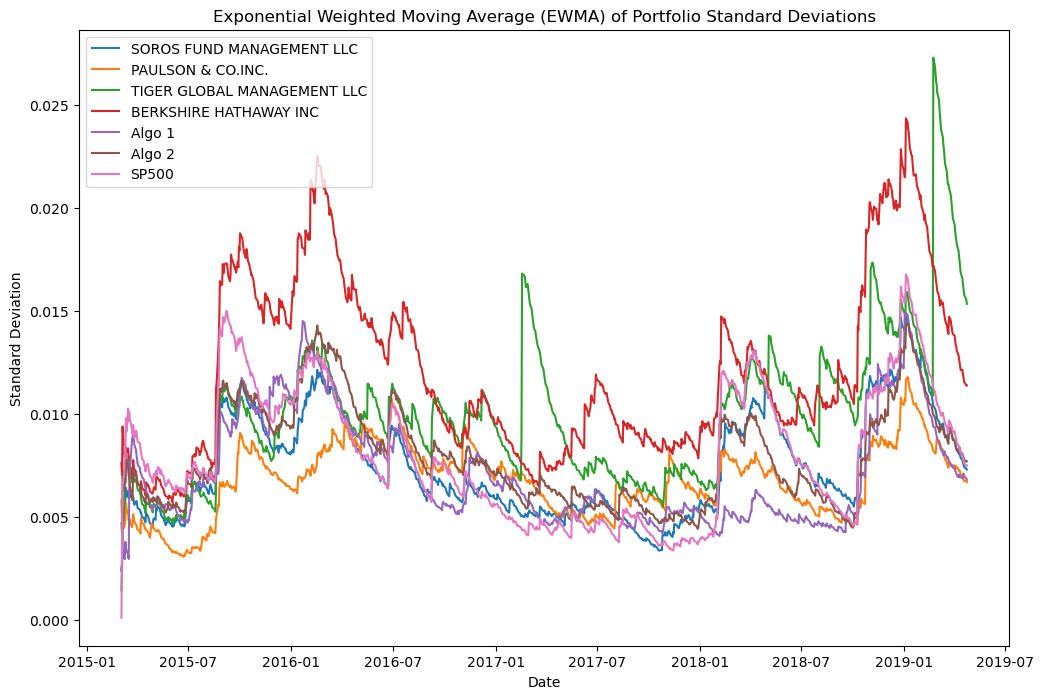

In [28]:
# Calculate the 21-day rolling window with exponentially weighted moving average for each portfolio's standard deviation
rolling_std_ewm = combined_df.ewm(halflife=21).std()

# Plot the results
plt.figure(figsize=(12, 8))
for column in rolling_std_ewm.columns:
    plt.plot(rolling_std_ewm.index, rolling_std_ewm[column], label=column)

plt.title('Exponential Weighted Moving Average (EWMA) of Portfolio Standard Deviations')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.show()



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

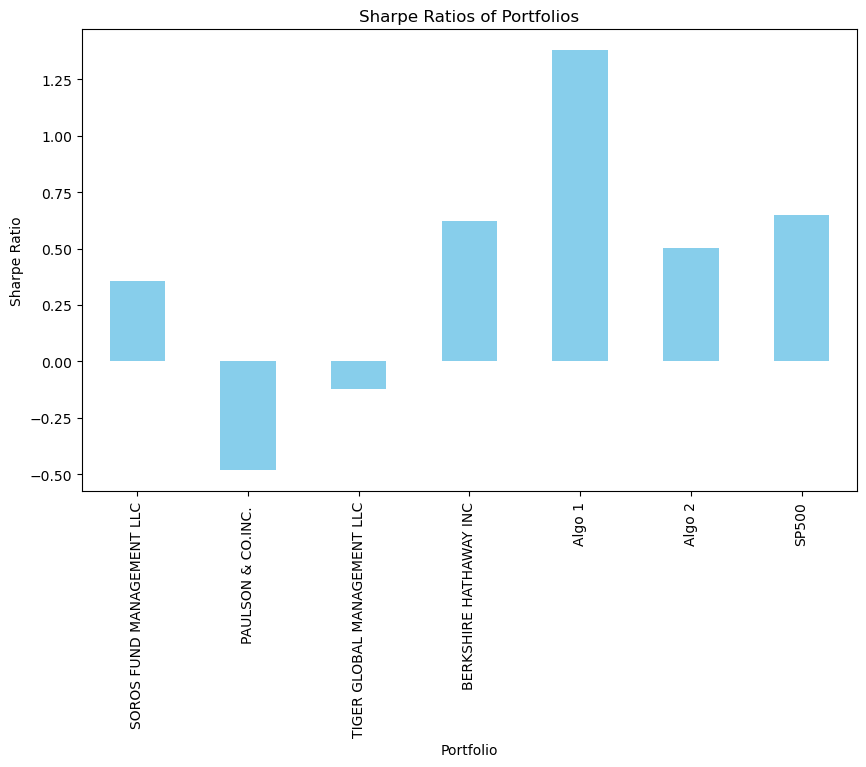

In [30]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratios of Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.show()

<Figure size 1200x800 with 0 Axes>

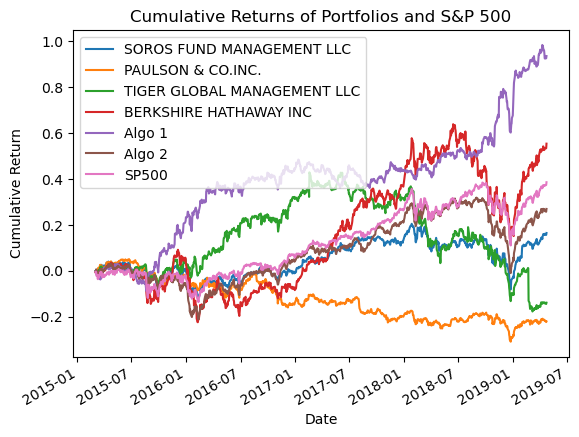

In [31]:
# Calculate cumulative returns
cumulative_returns = (1 + combined_df).cumprod() - 1

# Visualize cumulative returns
plt.figure(figsize=(12, 8))
cumulative_returns.plot()
plt.title('Cumulative Returns of Portfolios and S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.show()



### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algo 1 portfolio has almost always outperformed both the markert and whale portfolios. Berkshire Hathaway outperformed Algo 1 one time during 2018.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Read CSV file
file_path = Path("../Starter_Code/Resources/Energy Stocks.csv")  # Replace with the actual file path
energy_stocks = pd.read_csv(file_path, parse_dates=True, index_col='Date')

# Reorganize portfolio data by having a column per symbol
energy_stocks = energy_stocks.rename(columns={
    'BP': 'BP_Return',
    'Exxon': 'Exxon_Return',
    'Shell': 'Shell_Return',
    'Chevron': 'Chevron_Return',
    'SP 500': 'SP500_Return'
})

In [33]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([energy_stocks['BP_Return'],
                       energy_stocks['Exxon_Return'],
                       energy_stocks['Shell_Return'],
                       energy_stocks['Chevron_Return'],
                       energy_stocks['SP500_Return']], axis=1)

# Rename columns for clarity
all_stocks.columns = ['BP', 'Exxon', 'Shell', 'Chevron', 'SP500']

# Display the combined DataFrame
print(all_stocks.head())



               BP  Exxon  Shell  Chevron    SP500
Date                                             
2019-01-02  38.59  69.69  25.96   110.69  2510.03
2019-01-03  38.81  68.62  25.93   108.57  2447.89
2019-01-04  40.03  71.15  26.42   110.82  2531.94
2019-01-07  40.16  71.52  26.37   112.26  2549.69
2019-01-08  40.03  72.04  26.33   111.77  2574.41


In [34]:
# Reset Date index
all_stocks_reset = all_stocks.reset_index()

# Display the DataFrame with the reset index
print(all_stocks_reset.head())


        Date     BP  Exxon  Shell  Chevron    SP500
0 2019-01-02  38.59  69.69  25.96   110.69  2510.03
1 2019-01-03  38.81  68.62  25.93   108.57  2447.89
2 2019-01-04  40.03  71.15  26.42   110.82  2531.94
3 2019-01-07  40.16  71.52  26.37   112.26  2549.69
4 2019-01-08  40.03  72.04  26.33   111.77  2574.41


In [35]:
# Calculate daily returns
all_stocks_returns = all_stocks.pct_change()

# Drop NAs
all_stocks_returns = all_stocks_returns.dropna()

# Display sample data
print(all_stocks_returns.head())


                  BP     Exxon     Shell   Chevron     SP500
Date                                                        
2019-01-03  0.005701 -0.015354 -0.001156 -0.019153 -0.024757
2019-01-04  0.031435  0.036870  0.018897  0.020724  0.034336
2019-01-07  0.003248  0.005200 -0.001893  0.012994  0.007010
2019-01-08 -0.003237  0.007271 -0.001517 -0.004365  0.009695
2019-01-09  0.008244  0.005275 -0.001139  0.013420  0.004098


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Select the stocks you want to include in the portfolio
selected_stocks = ['BP', 'Exxon', 'Chevron']

# Filter the DataFrame to include only selected stocks
selected_stocks_returns = all_stocks_returns[selected_stocks]

# Calculate portfolio return
portfolio_return = selected_stocks_returns.dot(weights)

# Display sample data
print(portfolio_return.head())


Date
2019-01-03   -0.009602
2019-01-04    0.029676
2019-01-07    0.007147
2019-01-08   -0.000110
2019-01-09    0.008980
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Concatenate the original returns DataFrame and the portfolio return
all_returns = pd.concat([all_stocks_returns, portfolio_return], axis=1)

# Rename the column to make it clear it's the portfolio return
all_returns = all_returns.rename(columns={0: 'Portfolio'})

# Display the updated DataFrame
print(all_returns.head())



                  BP     Exxon     Shell   Chevron     SP500  Portfolio
Date                                                                   
2019-01-03  0.005701 -0.015354 -0.001156 -0.019153 -0.024757  -0.009602
2019-01-04  0.031435  0.036870  0.018897  0.020724  0.034336   0.029676
2019-01-07  0.003248  0.005200 -0.001893  0.012994  0.007010   0.007147
2019-01-08 -0.003237  0.007271 -0.001517 -0.004365  0.009695  -0.000110
2019-01-09  0.008244  0.005275 -0.001139  0.013420  0.004098   0.008980


In [38]:
# Drop NaNs
all_returns_cleaned = all_returns.dropna()

# Display the updated DataFrame
print(all_returns_cleaned.head())


                  BP     Exxon     Shell   Chevron     SP500  Portfolio
Date                                                                   
2019-01-03  0.005701 -0.015354 -0.001156 -0.019153 -0.024757  -0.009602
2019-01-04  0.031435  0.036870  0.018897  0.020724  0.034336   0.029676
2019-01-07  0.003248  0.005200 -0.001893  0.012994  0.007010   0.007147
2019-01-08 -0.003237  0.007271 -0.001517 -0.004365  0.009695  -0.000110
2019-01-09  0.008244  0.005275 -0.001139  0.013420  0.004098   0.008980


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
portfolio_annualized_std = all_returns.std() * np.sqrt(252)
# Print the annualized std
print("Annualized Standard Deviation:")
print(portfolio_annualized_std)


Annualized Standard Deviation:
BP           0.376504
Exxon        0.344207
Shell        0.353907
Chevron      0.355886
SP500        0.213441
Portfolio    0.335117
dtype: float64


### Calculate and plot rolling `std` with 21-day window

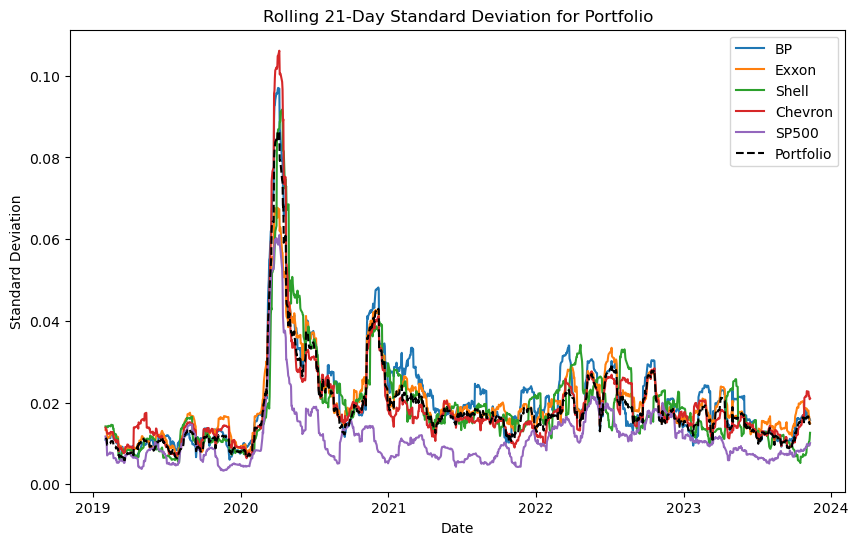

In [40]:
# Calculate rolling standard deviation
rolling_std = all_returns.rolling(window=21).std()

# Plot rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(rolling_std['BP'], label='BP')
plt.plot(rolling_std['Exxon'], label='Exxon')
plt.plot(rolling_std['Shell'], label='Shell')
plt.plot(rolling_std['Chevron'], label='Chevron')
plt.plot(rolling_std['SP500'], label='SP500')
plt.plot(rolling_std['Portfolio'], label='Portfolio', linestyle='--', color='black')

plt.title('Rolling 21-Day Standard Deviation for Portfolio')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


### Calculate and plot the correlation

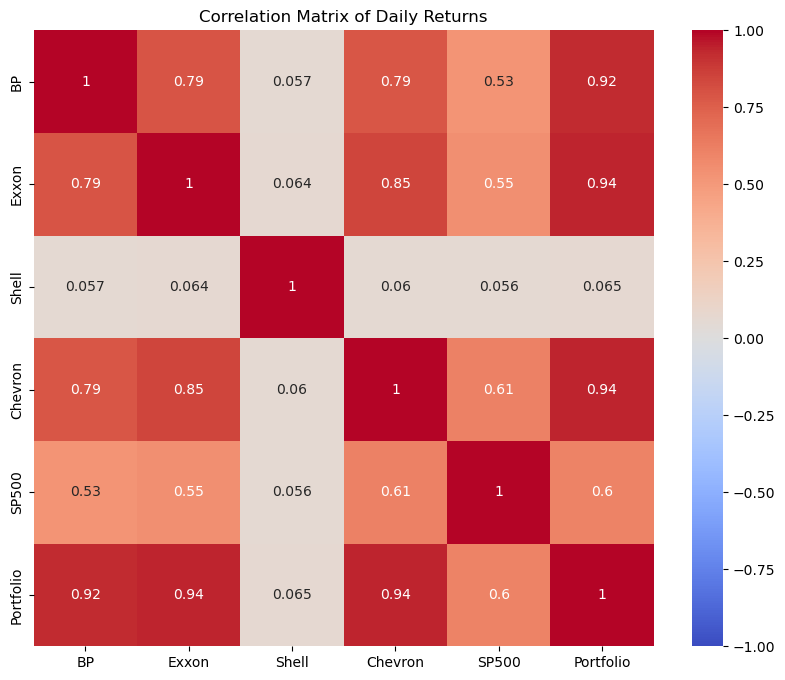

In [41]:
# Calculate the correlation matrix
correlation_matrix = all_returns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Daily Returns')
plt.show()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

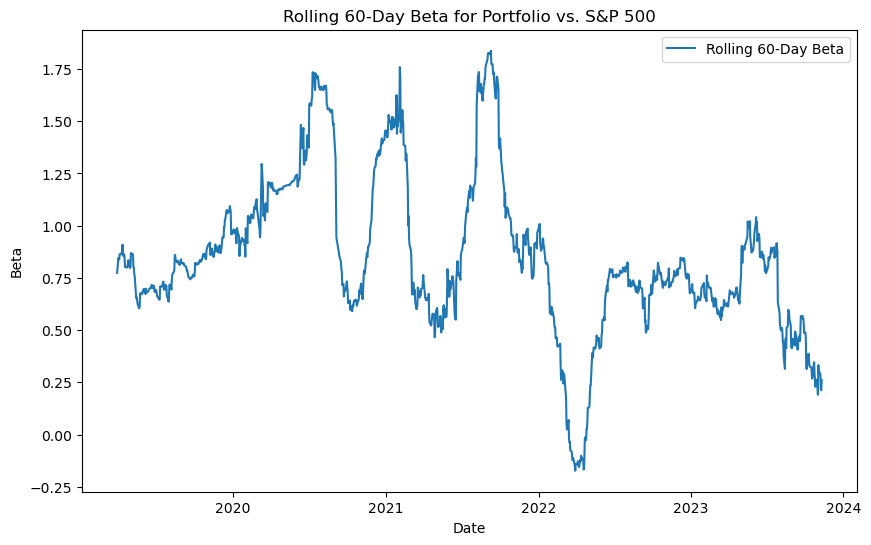

In [45]:
# Calculate rolling covariance with S&P 500
rolling_covariance = all_returns['Portfolio'].rolling(window=60).cov(all_returns['SP500'])

# Calculate rolling variance of S&P 500
rolling_variance_sp500 = all_returns['SP500'].rolling(window=60).var()

# Calculate rolling beta
rolling_beta = rolling_covariance / rolling_variance_sp500

# Plot rolling beta
plt.figure(figsize=(10, 6))
plt.plot(rolling_beta, label='Rolling 60-Day Beta')
plt.title('Rolling 60-Day Beta for Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.show()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

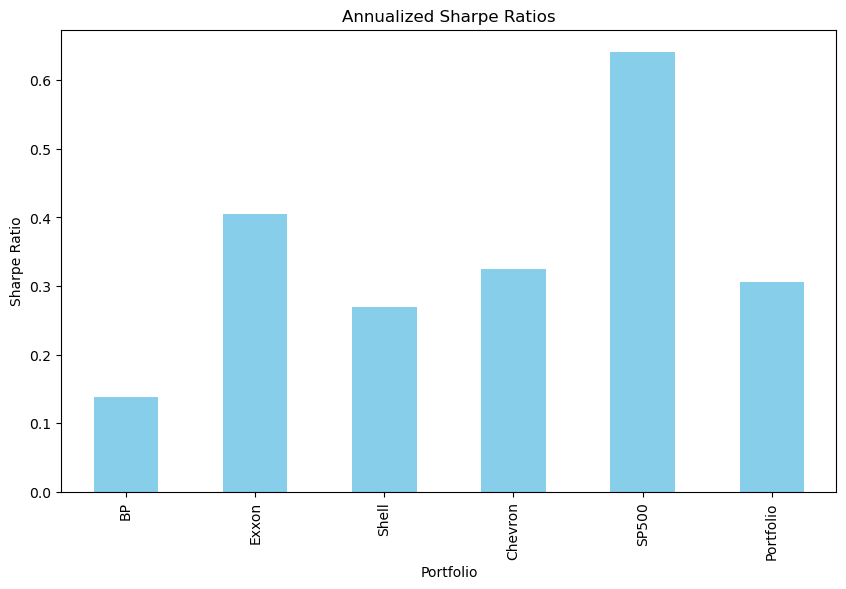

In [46]:
# Calculate Annualized Sharpe Ratios
annualized_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))

# Visualize the Sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
annualized_sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Annualized Sharpe Ratios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.show()



### How does your portfolio do?

The S&P 500 has a better risk-adjusted performance than my portfolio.